## Author : Loka Akash Reddy

## Data Scientist Intern - Technocolabs Softwares

## Task : Exploratory Data Analysis

### Perform ‘Exploratory Data Analysis’ on dataset ‘Stock’

### 1. Importing the required libraries for EDA
#### Below are the libraries that are used in order to perform EDA (Exploratory data analysis)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

### 2. Loading the data into the data frame.

In [2]:
df = pd.read_csv("all_stocks_5yr.csv")
# To display the top 5 rows 
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.tail()                        

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [4]:
type(df.date[0])

str

In [5]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


### 3. Checking the types of data

In [7]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

### 4. Dropping the duplicate rows

In [8]:
df.shape

(619040, 7)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [10]:
df.count()      # Used to count the number of rows

date      619040
open      619029
high      619032
low       619032
close     619040
volume    619040
Name      619040
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [12]:
df.count()

date      619040
open      619029
high      619032
low       619032
close     619040
volume    619040
Name      619040
dtype: int64

### 5. Dropping the missing or null values.

In [13]:
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [14]:
df = df.dropna()    # Dropping the missing values.
df.count()

date      619029
open      619029
high      619029
low       619029
close     619029
volume    619029
Name      619029
dtype: int64

In [15]:
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


### 6. Detecting Outliers

<AxesSubplot:xlabel='open'>

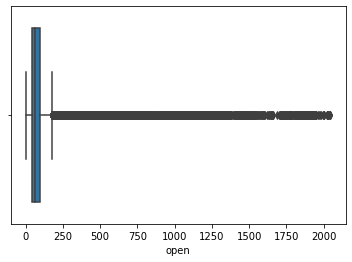

In [16]:
sns.boxplot(x=df['open'])

<AxesSubplot:xlabel='low'>

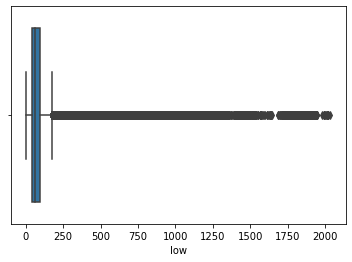

In [17]:
sns.boxplot(x=df['low'])

<AxesSubplot:xlabel='volume'>

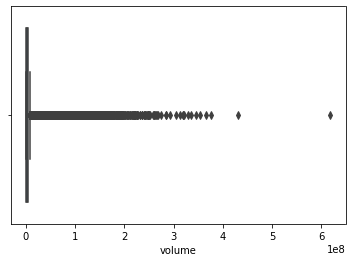

In [18]:
sns.boxplot(x=df['volume'])

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

open      5.415000e+01
high      5.456000e+01
low       5.371000e+01
close     5.416920e+01
volume    3.214199e+06
dtype: float64


In [20]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(520354, 7)

### 7. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

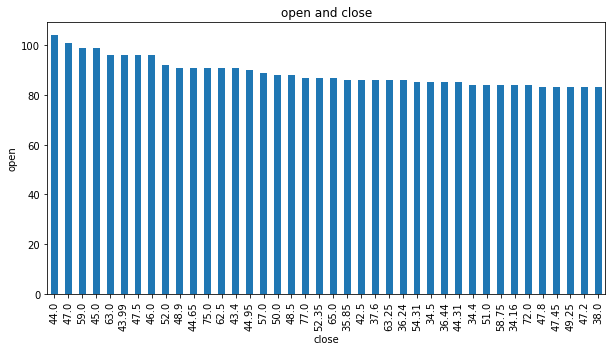

In [21]:
df.close.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("open and close")
plt.ylabel('open')
plt.xlabel('close');

### Heat Maps

,open,high,low,close,volume
open,1.000000,0.999837,0.999821,0.999671,-0.314726
high,0.999837,1.000000,0.999750,0.999837,-0.313069
low,0.999821,0.999750,1.000000,0.999834,-0.316563
close,0.999671,0.999837,0.999834,1.000000,-0.314935
volume,-0.314726,-0.313069,-0.316563,-0.314935,1.000000


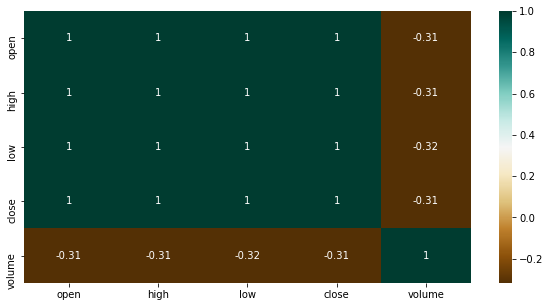

In [22]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

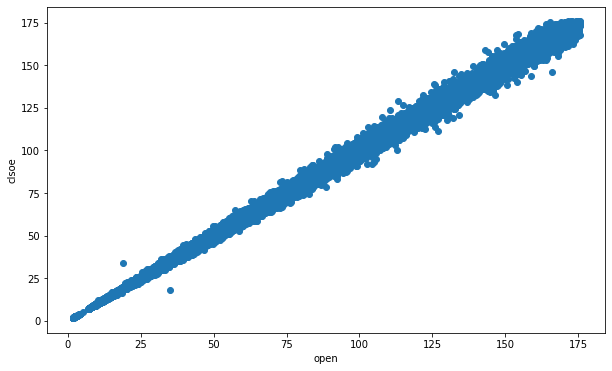

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['open'], df['close'])
ax.set_xlabel('open')
ax.set_ylabel('clsoe')
plt.show()

### 8. Importing dtale, sweetviz

In [24]:
!pip install dtale

In [25]:
import dtale
dtale.show(df)

In [26]:
!pip install pandas-profiling

In [27]:
from pandas_profiling import ProfileReport

In [28]:
pro = ProfileReport(df,explorative=True)
pro.to_file('output.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
!pip install sweetviz

In [30]:
import sweetviz as sz

In [31]:
report = sz.analyze(df)
report.show_html('sweet.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Hence the above are some of the steps involved in Exploratory data analysis

## Thank you